In [72]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score
import hyperopt as hp 

In [73]:
#data sets being combined 
def get_datasets(std_size=False):
    # My python only likes absolute paths 
    brca = pd.read_csv('/Users/danielraad/Desktop/data/Gistic2_CopyNumber_BRCA', sep='\t')
    ovca = pd.read_csv('/Users/danielraad/Desktop/data/Gistic2_CopyNumber_OVCA', sep='\t')
    brca.set_index('Gene Symbol', inplace=True)
    ovca.set_index('Gene Symbol', inplace=True)
    brca = brca.transpose()
    ovca = ovca.transpose()
    brca['BRCA'] = 1
    ovca['BRCA'] = 0
    print('size brca, ovca', len(brca), len(ovca))
    if not std_size:
        print('normal size', len(brca)+len(ovca))
        df = pd.concat([brca, ovca[1:]])
    elif std_size:
        print('sampled size', len(ovca)+len(ovca))
        df = pd.concat([brca[0:len(ovca)], ovca[1:]])
    return df
df = get_datasets()

size brca, ovca 1080 579
normal size 1659


/Users/danielraad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


In [74]:
#seperate the target variable from the other variables
y = df["BRCA"]
X = df[df.columns[:-1]]
X_train, X_test, y_train, y_tests = train_test_split(X, y, test_size = 0.33, random_state = 42)
y_red = pd.Series(y)
features = list(X_train.columns)

In [22]:
## Pruning data, finding the best values to use in the parameters 

#will do both manual technique and using hyperopt 

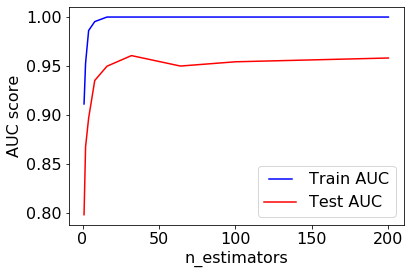

In [75]:
#will see what is the best number of trees in the forest to use 
# value is between 20 and
n_estimators = [1,2,4,8,16,32,64,100,200]

train_results = [] 
test_results = [] 
for estimator in n_estimators: 
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    train_pred = rf.predict(X_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_tests, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()
    

/Users/danielraad/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/danielraad/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/danielraad/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/danielraad/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/danielraad/anacon

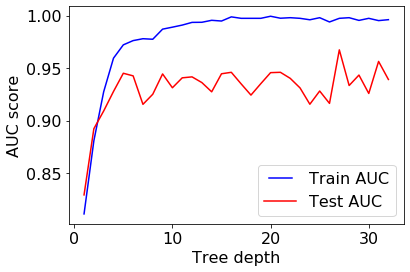

In [76]:
#finding the optimum depth 
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_tests, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [ ]:
## tuning techniques from: 
## https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [13]:
rf = RandomForestClassifier(random_state = 42)

In [15]:
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 'warn', 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [25]:
#this is going to random search all of these different paramters available to random forest and give me an idea 
#of where to look in my data
from sklearn.model_selection import RandomizedSearchCV 

#number of trees in random forest 
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10) ]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10,110, num = 11)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)




{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [27]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs= -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 55.5min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [28]:
print(rf_random.best_params_)

{'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 70, 'bootstrap': False}


In [30]:
#this provides far more accurate metric 
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [False],
    'max_depth': [65, 75, 85, 95], 
    'max_features': [2,3],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [4,5,6],
    'n_estimators': [400,500, 550, 650]
}

rf = RandomForestClassifier() 
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid , cv = 3, n_jobs = -1, verbose = 2)


In [32]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.0s
/Users/danielraad/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   50.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  4.6min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [33]:
print(grid_search.best_params_) 

{'bootstrap': False, 'max_depth': 65, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 400}


In [77]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    vals = abs(predictions - test_labels)
    errors = [] 
    for x in vals:
        if x == 1:
            errors.append(x)
    print(errors)
    accuracy = 100 - (100 * ( len(errors) / len(predictions)))
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [78]:
base_model = RandomForestClassifier()
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_tests)
np.seterr('raise')

best_model1 = RandomForestClassifier(bootstrap = False, max_depth = 65, max_features = 3, min_samples_leaf = 2, min_samples_split = 4, n_estimators = 400)
best_model1.fit(X_train, y_train)
best_accuracy1 = evaluate (best_model1, X_test, y_tests)
# best_model = grid_search.best_estimator_
# best_accuracy = evaluate(best_model, X_test, y_tests)

print('Improvement of {:0.2f}%.'.format( 100 * (best_accuracy1 - base_accuracy) / base_accuracy))

/Users/danielraad/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Model Performance
Accuracy = 94.16%.
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Model Performance
Accuracy = 96.35%.
Improvement of 2.33%.


In [79]:
#Scoring with kfold 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_model1,df,y_red,cv=10,scoring='accuracy')
print(scores.mean())

0.9451186564439575


In [42]:
## Evaluation
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[180  10]
 [ 10 348]]


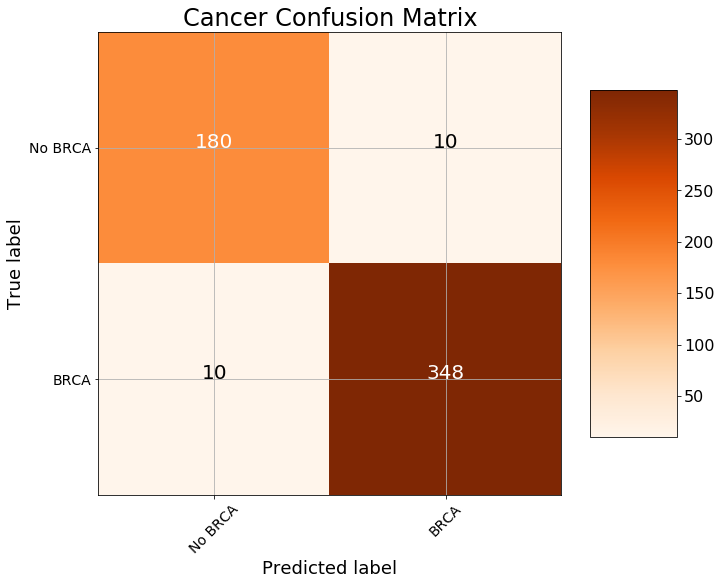

In [80]:
#Cancer confusion matrix for the pruned model, finding the number of errors made on the test set 
rf_predictions = best_model1.predict(X_test)
cm = confusion_matrix(y_tests, rf_predictions)
plot_confusion_matrix(cm, classes = ['No BRCA', 'BRCA'],
                      title = 'Cancer Confusion Matrix')

In [44]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_tests, [1 for _ in range(len(y_tests))])
    baseline['precision'] = precision_score(y_tests, [1 for _ in range(len(y_tests))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_tests, predictions)
    results['precision'] = precision_score(y_tests, predictions)
    results['roc'] = roc_auc_score(y_tests, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_tests, [1 for _ in range(len(y_tests))])
    model_fpr, model_tpr, _ = roc_curve(y_tests, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

Recall Baseline: 1.0 Test: 0.97 Train: 1.0
Precision Baseline: 0.65 Test: 0.97 Train: 1.0
Roc Baseline: 0.5 Test: 0.99 Train: 1.0


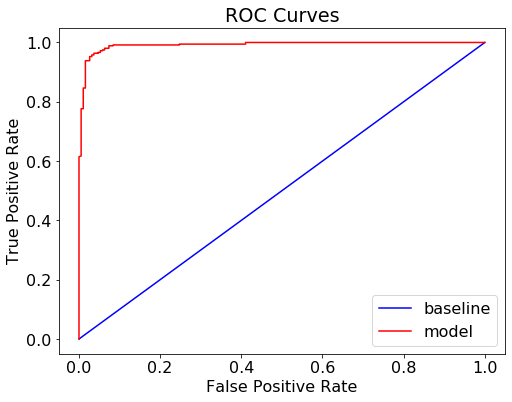

In [81]:
##AUC ROC testing for the pruned model 

train_rf_predictions = best_model1.predict(X_train)
train_rf_probs = best_model1.predict_proba(X_train)[:,1]
rf_predictions = best_model1.predict(X_test)
rf_probs = best_model1.predict_proba(X_test)[:,1]
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

In [83]:
#The most important features 
fi_model = pd.DataFrame({'feature': features,
                   'importance': best_model1.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi_model.head(10)

,feature,importance
12542,NARFL,0.001615
12425,MYO18A,0.001239
23974,ZNF555,0.001139
6400,FRG2,0.001133
23584,ZDHHC19,0.001128
23975,ZNF556,0.001104
10331,MATK,0.001101
13164,NUDT16L1,0.001093
17216,RN7SL91P,0.001093
22535,TXNDC11,0.001057


In [ ]:
##Doing a second grid search for more accurate values 
##

In [91]:
#this provides far more accurate metric 
from sklearn.model_selection import GridSearchCV
param_grid2 = {
    'bootstrap': [False],
    'max_depth': [55, 60, 65, 70], 
    'max_features': [2,3,4],
    'min_samples_leaf': [2],
    'min_samples_split': [3,4,5],
    'n_estimators': [350, 400, 450]
}

rf = RandomForestClassifier() 
grid_search2 = GridSearchCV(estimator = rf, param_grid = param_grid2 , cv = 3, n_jobs = -1, verbose = 2, pre_dispatch = 2 )
grid_search2.fit(X_train, y_train)
print(grid_search2.best_params_) 

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  3.6min finished


{'bootstrap': False, 'max_depth': 65, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 450}


In [92]:
#this provides far more accurate metric 
from sklearn.model_selection import GridSearchCV
param_grid3 = {
    'bootstrap': [False],
    'max_depth': [65], 
    'max_features': [3],
    'min_samples_leaf': [2],
    'min_samples_split': [4],
    'n_estimators': [425, 450, 475]
}

rf = RandomForestClassifier() 
grid_search3 = GridSearchCV(estimator = rf, param_grid = param_grid2 , cv = 3, n_jobs = -1, verbose = 2, pre_dispatch = 2)
grid_search3.fit(X_train, y_train)
print(grid_search3.best_params_) 

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  3.5min finished


{'bootstrap': False, 'max_depth': 55, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 450}


In [95]:
final_model = grid_search3.best_estimator_
final_accuracy = evaluate (final_model, X_test, y_tests)

print('Improvement of {:0.2f}%.'.format( 100 * (final_accuracy - best_accuracy1) / best_accuracy1))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Model Performance
Accuracy = 96.35%.
Improvement of 0.00%.


In [96]:
#Scoring with kfold 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(final_model,df,y_red,cv=10,scoring='accuracy')
print(scores.mean())

0.9439101861993429
